# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading train and test Data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.shape

(8693, 14)

In [6]:
test.shape

(4277, 13)

In [7]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

# Seperating target variable from train data

In [9]:
y = train.pop('Transported')
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


# Seperating PassengerId from train and test for future use

In [11]:
def remove_id(data):
    id_data = data.pop('PassengerId')
    return id_data

In [12]:
train_id = remove_id(train)
train_id.head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [13]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
dtypes: float64(6), object(6)
memory usage: 815.1+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Here Every name is unique. So we can remove the Name feature

In [16]:
def remove_name(data):
    data.drop('Name', axis=1, inplace=True)
    return data

In [17]:
train = remove_name(train)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


# Seperating Numerical and categorical features for analysis

In [18]:
def numerical_feature(data):
    num_data = data.select_dtypes('float64')
    return num_data

In [19]:
train_num = numerical_feature(train)
train_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [20]:
def categorical_feature(data):
    cat_data = data.select_dtypes('object')
    return cat_data

In [21]:
train_cat = categorical_feature(train)
train_cat.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False


In [22]:
train_num.isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [23]:
train_cat.isna().sum()

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
dtype: int64

In [24]:
y.isna().sum()

0

In [25]:
y.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

        The target value counts are equal, so it is not an imbalanced data.

# Univariate analysis for numerical feature

In [26]:
def histogram(data, feature):
    sns.distplot(data[feature], kde=False, color='DarkBlue')

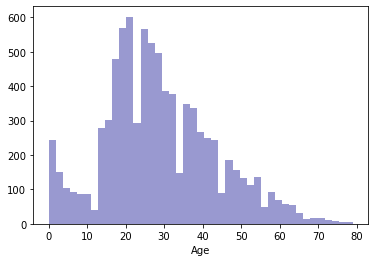

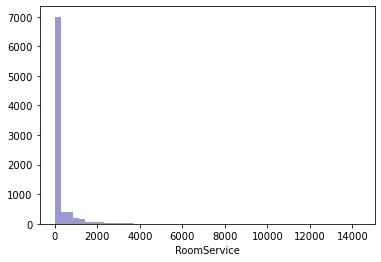

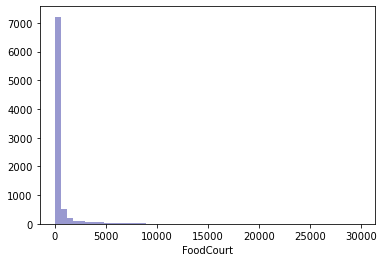

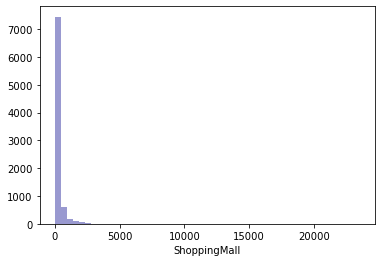

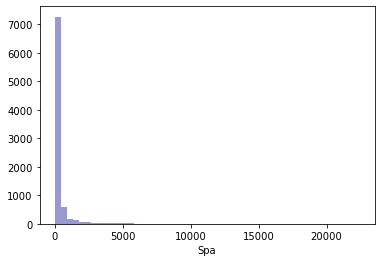

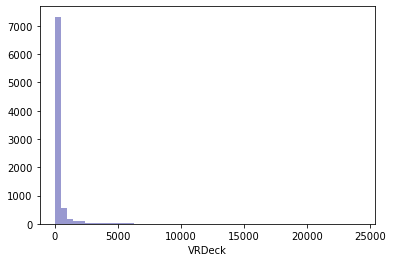

In [27]:
for i  in train_num.columns:
    histogram(train_num, i)
    plt.show()

        Replacing the age 0 with median age

In [28]:
def replace_age(data):
    for i in data['Age']:
        if i == 0:
            data['Age'].replace(to_replace = i, value = data['Age'].median(), inplace=True)
    return data

In [29]:
train_num = replace_age(train_num)
train_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


        Filling null values with median value because none of the data is normally distributed and consist of skewness and most of the value are zero. It doesn't have much impact on data distribution by changing null values to median value.

In [30]:
def num_fill(data):
    for i in data.columns:
        data[i].fillna(data[i].median(), inplace=True)
    return data

In [31]:
train_num = num_fill(train_num)
train_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [32]:
train_num.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [33]:
def boxplot(data, feature):
    sns.boxplot(data[feature])

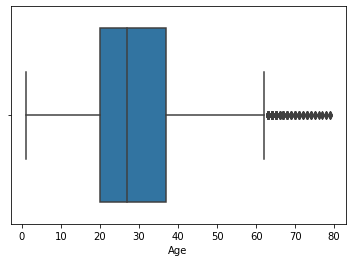

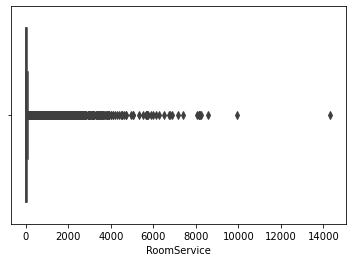

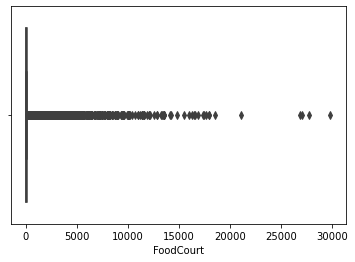

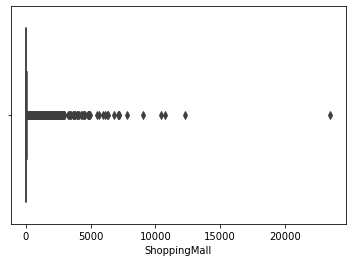

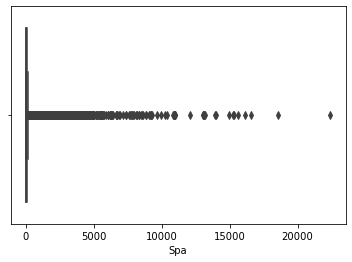

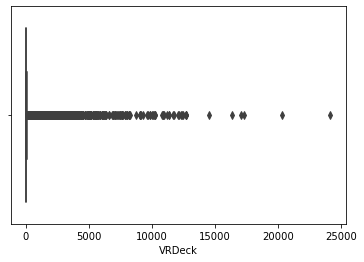

In [34]:
for i in train_num.columns:
    boxplot(train_num, i)
    plt.show()

        We didn't have clear evidence on money spend by the passangers in the ship. So we need to accept the outliers in all the numerical feature including age.

# Univariate Analysis for categorical features

In [35]:
for i in train_cat.columns:
    print("{} has {} unique values".format(i, train_cat[i].nunique()))

HomePlanet has 3 unique values
CryoSleep has 2 unique values
Cabin has 6560 unique values
Destination has 3 unique values
VIP has 2 unique values


        Cabin has more unique values. We can fill the cabin null values with random value and check for some intution. 

In [36]:
def cabin_random(data):
    random_sample = data['Cabin'].dropna().sample(data['Cabin'].isnull().sum(), random_state=42)
    random_sample.index = data[data['Cabin'].isnull()].index
    data['Cabin'] = data['Cabin'].fillna(random_sample)
    return data

In [37]:
train_cat = cabin_random(train_cat)
train_cat['Cabin'].isna().sum()

0

In [38]:
def cabin_seperation(data):
    cabin_deck = []
    cabin_side = []
    for i in data['Cabin']:
        value = i.split('/')
        cabin_deck.append(value[0])
        cabin_side.append(value[2])
    data.drop('Cabin', axis=1, inplace=True)
    return data, cabin_deck, cabin_side

In [39]:
def new_addition(data, cabin_deck, cabin_side):
    data['CabinDeck'] = cabin_deck
    data['CabinSide'] = cabin_side
    return data

In [40]:
train_cat, cabin_deck, cabin_side = cabin_seperation(train_cat)
train_cat.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [41]:
train_cat = new_addition(train_cat, cabin_deck, cabin_side)
train_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,CabinDeck,CabinSide
0,Europa,False,TRAPPIST-1e,False,B,P
1,Earth,False,TRAPPIST-1e,False,F,S
2,Europa,False,TRAPPIST-1e,True,A,S
3,Europa,False,TRAPPIST-1e,False,A,S
4,Earth,False,TRAPPIST-1e,False,F,S


In [42]:
train_cat['CabinDeck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [43]:
train_cat['CabinSide'].unique()

array(['P', 'S'], dtype=object)

In [44]:
def countplot(data, feature):
    sns.countplot(data[feature])

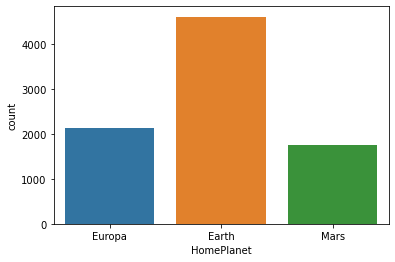

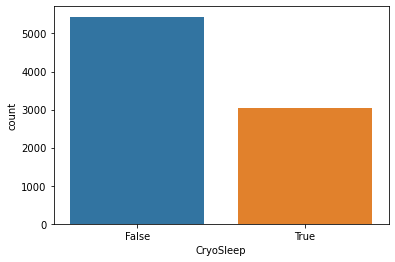

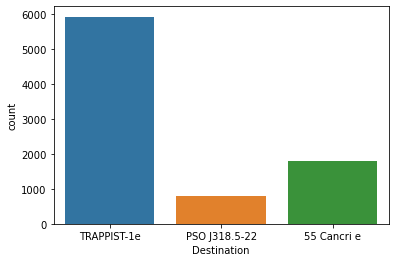

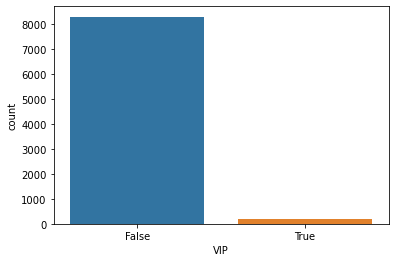

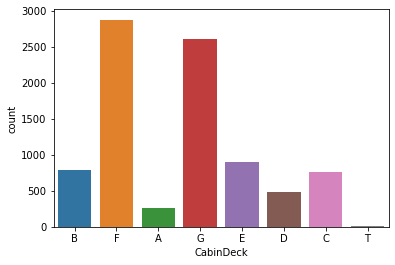

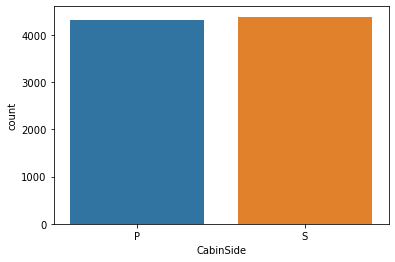

In [45]:
for i in train_cat.columns:
    countplot(train_cat, i)
    plt.show()

In [46]:
def fill_cat(data):
    for i in data.columns:
        data[i].fillna(data[i].value_counts().index[0], inplace=True)
    return data

In [47]:
train_cat = fill_cat(train_cat)
train_cat.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
CabinDeck      0
CabinSide      0
dtype: int64

# Exploratory Data Analysis

In [48]:
def countplot_hue(data, feature, hue):
    sns.countplot(data[feature], hue=hue)

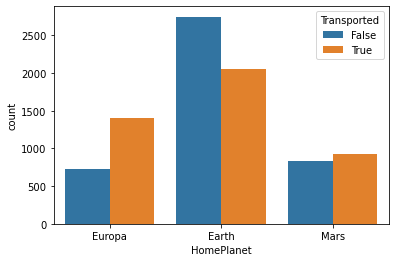

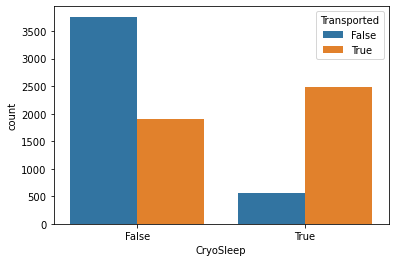

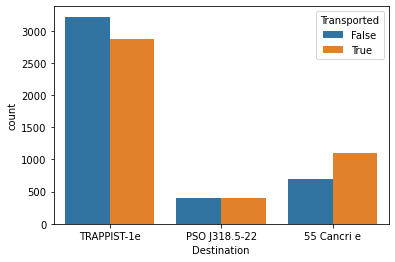

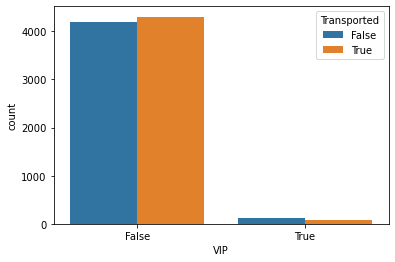

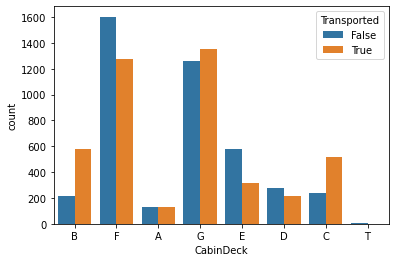

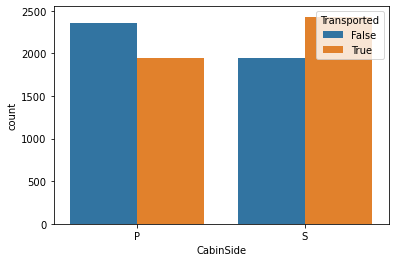

In [49]:
for i in train_cat.columns:
    countplot_hue(train_cat, i, y)
    plt.show()

        Evey values in the features are unique, we need to one hot encode the each categorical feature.

In [50]:
train_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,CabinDeck,CabinSide
0,Europa,False,TRAPPIST-1e,False,B,P
1,Earth,False,TRAPPIST-1e,False,F,S
2,Europa,False,TRAPPIST-1e,True,A,S
3,Europa,False,TRAPPIST-1e,False,A,S
4,Earth,False,TRAPPIST-1e,False,F,S


In [51]:
train_one_hot = pd.get_dummies(train_cat, prefix_sep="_")

In [52]:
train_one_hot.head()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,False,False,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,False,False,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,False,True,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,False,False,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,False,False,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [53]:
train_one_hot['CryoSleep'] = [1 if i == True else 0 for i in train_one_hot['CryoSleep']]
train_one_hot.head()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,False,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,True,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,False,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [54]:
train_one_hot['VIP'] = [1 if i == True else 0 for i in train_one_hot['VIP']]
train_one_hot.head()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [55]:
def add_new_feature(data):
    data['TotalSpend'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']
    return data

In [56]:
train_num = add_new_feature(train_num)
train_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0


# Scaling the numerical Feature

In [57]:
from sklearn.preprocessing import Normalizer

In [58]:
norm = Normalizer()

In [59]:
norm_data = norm.fit(train_num)

In [60]:
norm_data_val = norm.transform(train_num)

In [61]:
train_num_scale = pd.DataFrame(norm_data_val, columns=train_num.columns)
train_num_scale.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.025907,0.117661,0.009715,0.026987,0.592624,0.047496,0.794483
2,0.004506,0.003341,0.277808,0.000000,0.521667,0.003807,0.806623
3,0.005238,0.000000,0.203637,0.058885,0.528378,0.030633,0.821533
4,0.012535,0.237381,0.054840,0.118299,0.442640,0.001567,0.854727


# Joining both numerical and categorical feature

In [62]:
def join_both(data1, data2):
    data = data1.join(data2)
    return data

In [63]:
X = join_both(train_num_scale, train_one_hot)
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.025907,0.117661,0.009715,0.026987,0.592624,0.047496,0.794483,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.004506,0.003341,0.277808,0.000000,0.521667,0.003807,0.806623,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0.005238,0.000000,0.203637,0.058885,0.528378,0.030633,0.821533,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0.012535,0.237381,0.054840,0.118299,0.442640,0.001567,0.854727,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


# Changing y to number (1=True, 0=False)

In [64]:
y = pd.Series([1 if i == True else 0 for i in y])
y.head()

0    0
1    1
2    0
3    0
4    1
dtype: int64

# Building a logistic Regression model

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train.shape, y_train.shape

((6085, 25), (6085,))

In [68]:
X_test.shape, y_test.shape

((2608, 25), (2608,))

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
lr.score(X_train, y_train)

0.7972062448644207

In [73]:
lr.score(X_test, y_test)

0.7852760736196319

In [74]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [76]:
lr_score = accuracy_score(y_test, lr_pred)
lr_score

0.7852760736196319

In [77]:
lr_matrix = confusion_matrix(y_test, lr_pred)
lr_matrix

array([[ 926,  363],
       [ 197, 1122]], dtype=int64)

In [78]:
lr_pre = precision_score(y_test, lr_pred)
lr_pre

0.7555555555555555

# Making the test data for prediction

In [79]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [80]:
test_id = remove_id(test)
test_id.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [81]:
test = remove_name(test)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [82]:
test_num = numerical_feature(test)
test_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


In [83]:
test_cat = categorical_feature(test)
test_cat.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Earth,True,G/3/S,TRAPPIST-1e,False
1,Earth,False,F/4/S,TRAPPIST-1e,False
2,Europa,True,C/0/S,55 Cancri e,False
3,Europa,False,C/1/S,TRAPPIST-1e,False
4,Earth,False,F/5/S,TRAPPIST-1e,False


In [84]:
test_num = replace_age(test_num)
test_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


In [85]:
test_num = num_fill(test_num)
test_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


In [86]:
test_cat = cabin_random(test_cat)
test_cat.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Earth,True,G/3/S,TRAPPIST-1e,False
1,Earth,False,F/4/S,TRAPPIST-1e,False
2,Europa,True,C/0/S,55 Cancri e,False
3,Europa,False,C/1/S,TRAPPIST-1e,False
4,Earth,False,F/5/S,TRAPPIST-1e,False


In [87]:
test_cat, cabin_deck, cabin_side = cabin_seperation(test_cat)
test_cat.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Earth,True,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,True,55 Cancri e,False
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [88]:
test_cat = new_addition(test_cat, cabin_deck, cabin_side)
test_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,CabinDeck,CabinSide
0,Earth,True,TRAPPIST-1e,False,G,S
1,Earth,False,TRAPPIST-1e,False,F,S
2,Europa,True,55 Cancri e,False,C,S
3,Europa,False,TRAPPIST-1e,False,C,S
4,Earth,False,TRAPPIST-1e,False,F,S


In [89]:
test_cat_encode = pd.get_dummies(test_cat, prefix_sep='_')
test_cat_encode.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1


In [90]:
test_cat_encode.drop(['CryoSleep_False', 'VIP_False'], axis=1, inplace=True)
test_cat_encode.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [91]:
test_num = add_new_feature(test_num)
test_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,2832.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,7418.0
4,20.0,10.0,0.0,635.0,0.0,0.0,645.0


In [92]:
test_norm = norm.transform(test_num)
test_norm_df = pd.DataFrame(test_norm, columns=test_num.columns)
test_norm_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004751,0.000000,0.002251,0.000000,0.705971,0.000000,0.708221
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.003807,0.000000,0.666360,0.000000,0.018132,0.058602,0.743093
4,0.022090,0.011045,0.000000,0.701347,0.000000,0.000000,0.712392


In [93]:
test_data = join_both(test_norm_df, test_cat_encode)
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0.004751,0.000000,0.002251,0.000000,0.705971,0.000000,0.708221,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.003807,0.000000,0.666360,0.000000,0.018132,0.058602,0.743093,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0.022090,0.011045,0.000000,0.701347,0.000000,0.000000,0.712392,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [94]:
test_lr_pred = lr.predict(test_data)
test_lr_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [95]:
test_lr_pred = pd.Series([True if i == 1 else False for i in test_lr_pred])
test_lr_pred.head()

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [96]:
test_lr_out = pd.DataFrame({'PassengerId':test_id,
                           'Transported':test_lr_pred})
test_lr_out.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [97]:
test_lr_out.to_csv('test_lr_prediction.csv', index=False)

# Random Forest Model

In [98]:
from sklearnex.ensemble import RandomForestClassifier

In [99]:
rc = RandomForestClassifier(n_estimators= 80, n_jobs = 512)

In [100]:
rc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, n_jobs=512)

In [101]:
rc.score(X_train, y_train)

0.9222678718159408

In [102]:
rc.score(X_test, y_test)

0.7883435582822086

In [103]:
rc_pred = rc.predict(X_test)

In [104]:
rc_acc = accuracy_score(y_test, rc_pred)
rc_acc

0.7883435582822086

In [105]:
rc_matrix = confusion_matrix(y_test, rc_pred)
rc_matrix

array([[ 958,  331],
       [ 221, 1098]], dtype=int64)

In [106]:
rc_pre = precision_score(y_test, rc_pred)
rc_pre

0.768369489153254

In [107]:
test_rc_pred = rc.predict(test_data)
test_rc_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
test_rc_pred = pd.Series([True if i == 1 else False for i in test_rc_pred])
test_rc_pred.head()

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [109]:
test_rc_out = pd.DataFrame({'PassengerId':test_id,
                           'Transported':test_rc_pred})
test_rc_out.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [110]:
test_rc_out.to_csv('test_rc_prediction.csv', index=False)

# XGBOOSTING classifier

In [111]:
from xgboost import XGBClassifier

In [112]:
xg = XGBClassifier()

In [113]:
xg.fit(X_train, y_train)

[18:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
xg.score(X_train, y_train)

0.9010682004930156

In [115]:
xg.score(X_test, y_test)

0.7868098159509203

In [119]:
xg_pred = xg.predict(X_test)

In [120]:
xg_acc = accuracy_score(y_test, xg_pred)
xg_acc

0.7868098159509203

In [121]:
xg_matrix = confusion_matrix(y_test, xg_pred)
xg_matrix

array([[ 951,  338],
       [ 218, 1101]], dtype=int64)

In [126]:
test_xg_pred = xg.predict(test_data)

In [127]:
test_xg_pred = [True if i == 1 else False for i in test_xg_pred]

In [128]:
test_pred_xg = pd.DataFrame({'PassengerId':test_id,
                            'Transported':test_xg_pred})
test_pred_xg.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [129]:
test_pred_xg.to_csv('xgboost_prediction.csv', index=False)

# Support Vector Algorithm 

In [130]:
from sklearn.svm import SVC

In [131]:
sv = SVC()

In [132]:
sv.fit(X_train, y_train)

SVC()

In [133]:
sv.score(X_train, y_train)

0.8118323746918652

In [134]:
sv.score(X_test, y_test)

0.785659509202454

In [135]:
test_sv_pred = sv.predict(test_data)

In [136]:
test_sv_pred = [True if i == 1 else False for i in test_sv_pred]

In [137]:
test_pred_sv = pd.DataFrame({'PassengerId':test_id,
                            'Transported':test_sv_pred})
test_pred_sv.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [138]:
test_pred_sv.to_csv('SVC_prediction.csv', index=False)

# Stacking Classifier

In [144]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

In [145]:
lr = LogisticRegression()
xg = XGBClassifier()
rc = RandomForestClassifier()
dc = DecisionTreeClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [146]:
clf = [('rc', rc), ('xg', xg), ('dc', dc), ('nb', nb), ('knn', knn)]

In [147]:
stack_model = StackingClassifier(estimators=clf, final_estimator=lr)
score = cross_val_score(stack_model, X_train, y_train, cv=3, scoring='accuracy')
print("The mean accuracy score is {}".format(score.mean()))

[19:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [148]:
stack_model.fit(X_train, y_train)

[19:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('rc', RandomForestClassifier()),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,

In [149]:
stack_model.score(X_train, y_train)

0.9161873459326212

In [150]:
stack_model.score(X_test, y_test)

0.7887269938650306

In [151]:
stack_model_pred = stack_model.predict(X_test)

In [152]:
stack_acc = accuracy_score(y_test, stack_model_pred)
stack_acc

0.7887269938650306

In [153]:
stack_matrix = confusion_matrix(y_test, stack_model_pred)
stack_matrix

array([[ 955,  334],
       [ 217, 1102]], dtype=int64)

In [154]:
stack_test_pred = stack_model.predict(test_data)

In [155]:
stack_test_pred = [True if i == 1 else False for i in stack_test_pred]

In [156]:
stack_pred_test = pd.DataFrame({'PassengerId':test_id,
                               'Transported':stack_test_pred})
stack_pred_test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [157]:
stack_pred_test.to_csv('Stack_model_prediction.csv', index=False)